In [1]:
# 1. Загрузить файл hr.csv
# 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
# 3. Рассчитать и визуализировать корреляционную матрицу для переменных
# 4. Визуализировать несколько взаимосвязей между переменными
# 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными
# 6. Рассчитать сколько работников работает в каждом департаменте
# 7. Показать распределение сотрудников по зарплатам
# 8. Показать распределение сотрудников по зарплатам совместно с департаментами
# 9. Сколько сотрудников покинули компанию
# 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию
# 11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import scipy
from scipy import stats

In [3]:
# 1. Загрузить файл hr.csv
hr = pd.read_csv('HR.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
hr['department'] = hr['sales']
hr.drop('sales', axis=1, inplace=True)
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department
0,0.38,0.53,2,157,3,0,1,0,low,sales
1,0.80,0.86,5,262,6,0,1,0,medium,sales
2,0.11,0.88,7,272,4,0,1,0,medium,sales
3,0.72,0.87,5,223,5,0,1,0,low,sales
4,0.37,0.52,2,159,3,0,1,0,low,sales


In [6]:
hr['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [7]:
hr['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [8]:
# параметр 'salary' можно закодировать в цифрах
hr['salary_num'] = hr['salary'].apply(lambda x: 1 if x == 'low' else 2 if x == 'medium' else 3)
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department,salary_num
0,0.38,0.53,2,157,3,0,1,0,low,sales,1
1,0.80,0.86,5,262,6,0,1,0,medium,sales,2
2,0.11,0.88,7,272,4,0,1,0,medium,sales,2
3,0.72,0.87,5,223,5,0,1,0,low,sales,1
4,0.37,0.52,2,159,3,0,1,0,low,sales,1


In [9]:
# 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
# параметр 'depatment' закодируем в цифрах по убыванию в зависимости от общего числа работников в нем
depatment_num = {v:k for k,v in enumerate(hr[['department','salary']].groupby('department').count().reset_index().sort_values('salary', ascending=False)['department'])}
print(depatment_num)
hr['depatment_num'] = hr.apply(lambda x: depatment_num[x['department']], axis=1)
hr.head()

{'sales': 0, 'technical': 1, 'support': 2, 'IT': 3, 'product_mng': 4, 'marketing': 5, 'RandD': 6, 'accounting': 7, 'hr': 8, 'management': 9}


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department,salary_num,depatment_num
0,0.38,0.53,2,157,3,0,1,0,low,sales,1,0
1,0.80,0.86,5,262,6,0,1,0,medium,sales,2,0
2,0.11,0.88,7,272,4,0,1,0,medium,sales,2,0
3,0.72,0.87,5,223,5,0,1,0,low,sales,1,0
4,0.37,0.52,2,159,3,0,1,0,low,sales,1,0


In [11]:
# 3. Рассчитать и визуализировать корреляционную матрицу для переменных

cor = hr.corr()
cor

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num,depatment_num
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022,-0.008430
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002,0.004741
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803,-0.008138
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242,-0.008511
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715,0.043883
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247,0.003402
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898,-0.028394
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119,0.072657
salary_num,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000,0.102711
depatment_num,-0.008430,0.004741,-0.008138,-0.008511,0.043883,0.003402,-0.028394,0.072657,0.102711,1.000000


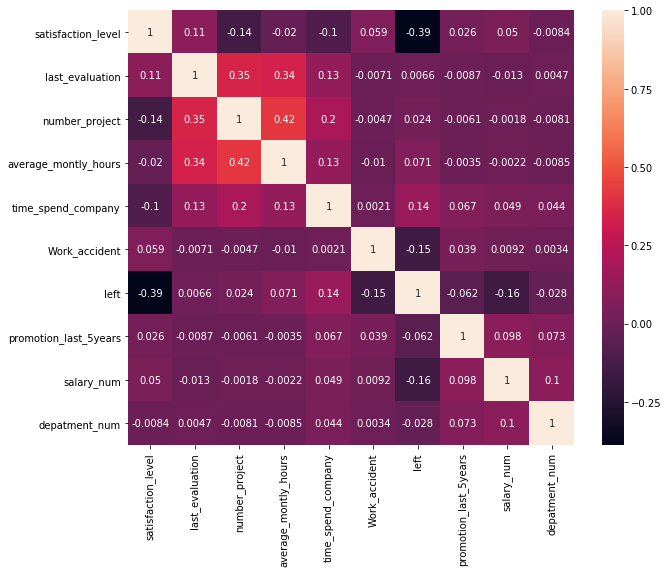

In [12]:
matplotlib.pyplot.figure(figsize=(10, 8))
sns.heatmap(cor,annot=True, xticklabels=cor.columns.values, yticklabels=cor.columns.values)

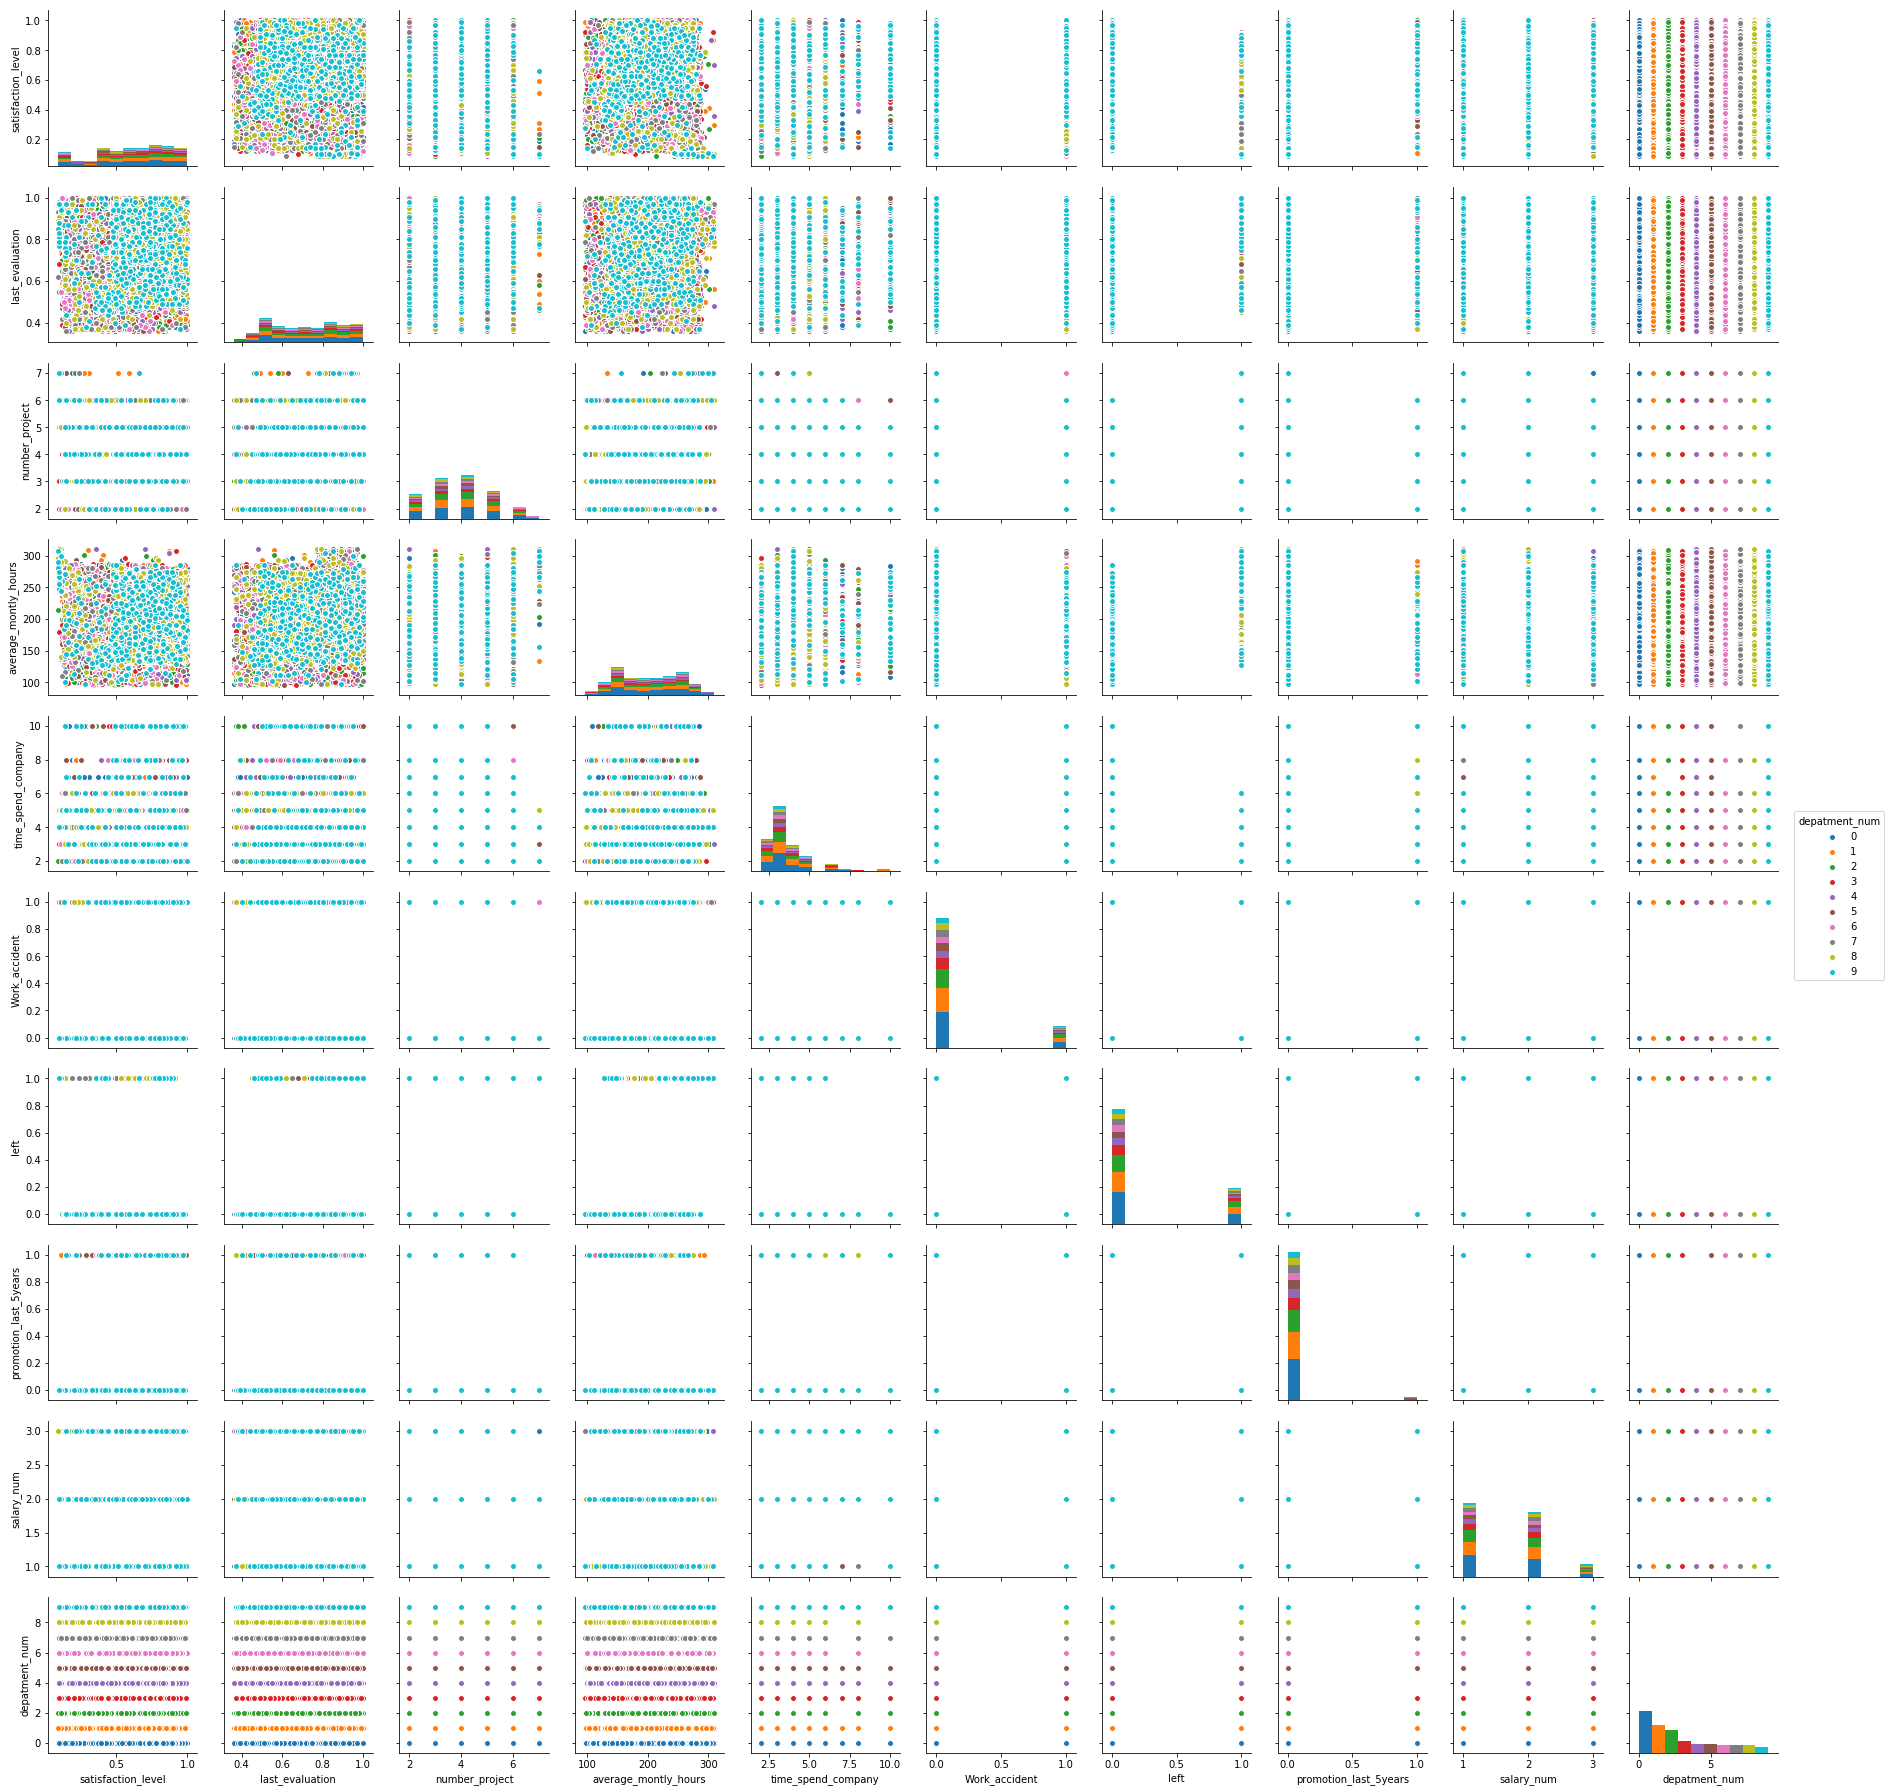

In [13]:
sns.pairplot(hr, hue='depatment_num')

/home/user/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/user/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


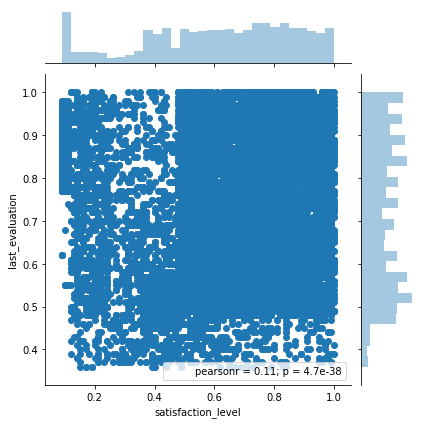

In [14]:
sns.jointplot(hr['satisfaction_level'], hr['last_evaluation'])

/home/user/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/user/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


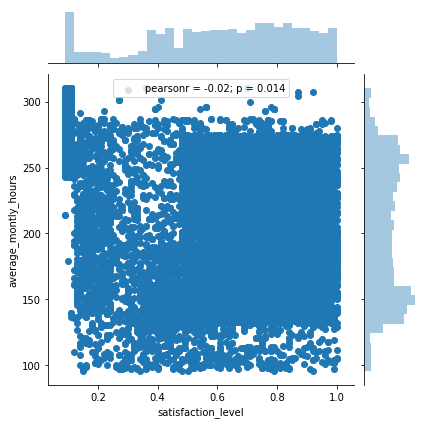

In [15]:
sns.jointplot(hr['satisfaction_level'], hr['average_montly_hours'])

/home/user/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/user/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


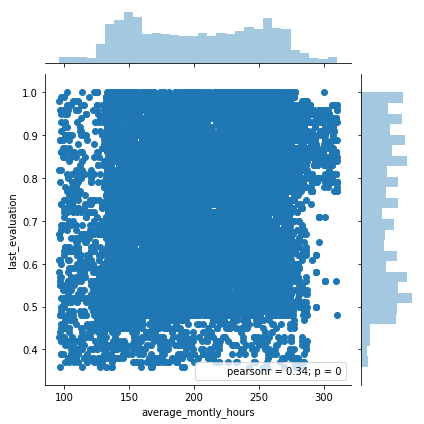

In [16]:
sns.jointplot(hr['average_montly_hours'], hr['last_evaluation'])

In [17]:
# 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными
hr.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department,salary_num,depatment_num
0,0.38,0.53,2,157,3,0,1,0,low,sales,1,0


In [18]:
stats.ttest_ind(hr['number_project'],hr['time_spend_company'])

Ttest_indResult(statistic=19.536753519083355, pvalue=1.7938911515379e-84)

In [19]:
stats.ttest_ind(hr['Work_accident'],hr['left'])

Ttest_indResult(statistic=-20.724471296371643, pvalue=9.625063899986344e-95)

In [20]:
stats.ttest_ind(hr['satisfaction_level'],hr['last_evaluation'])

Ttest_indResult(statistic=-41.89868154070206, pvalue=0.0)

In [21]:
# проверим взаимосвязи между одними переменными для разных depatment
samples = [hr[hr['depatment_num'] == x] for x in range(len(depatment_num.keys()))]

for i in range(1,len(samples)):
    print('0 и '+str(i)+ ' left :',stats.ttest_ind(samples[0]['left'],samples[i]['left']))
print()    
for i in range(1,len(samples)):    
    print('0 и '+str(i)+ ' sat_l:',stats.ttest_ind(samples[0]['satisfaction_level'],samples[i]['satisfaction_level']))

0 и 1 left : Ttest_indResult(statistic=-1.0601649378624074, pvalue=0.2891069046174478)
0 и 2 left : Ttest_indResult(statistic=-0.3588775547680543, pvalue=0.7196985908703364)
0 и 3 left : Ttest_indResult(statistic=1.6165666737332176, pvalue=0.10603064390656178)
0 и 4 left : Ttest_indResult(statistic=1.6187389616951227, pvalue=0.10556601038530346)
0 и 5 left : Ttest_indResult(statistic=0.5173741487998068, pvalue=0.6049179071080817)
0 и 6 left : Ttest_indResult(statistic=5.585022689156397, pvalue=2.4621542895541022e-08)
0 и 7 left : Ttest_indResult(statistic=-1.239170655359417, pvalue=0.21534159524686108)
0 и 8 left : Ttest_indResult(statistic=-2.655253863775317, pvalue=0.007950636794700677)
0 и 9 left : Ttest_indResult(statistic=5.586374850957105, pvalue=2.4473864867544165e-08)

0 и 1 sat_l: Ttest_indResult(statistic=1.0538002676687468, pvalue=0.29201149607000193)
0 и 2 sat_l: Ttest_indResult(statistic=-0.5891866159336399, pvalue=0.555756997961023)
0 и 3 sat_l: Ttest_indResult(statistic=

In [22]:
# 6. Рассчитать сколько работников работает в каждом департаменте

In [23]:
# 1 вар с помощью volue_counts()
hr['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [24]:
# 2 вар с помощью групировки 
hr[['satisfaction_level', 'department']].groupby('department').count().sort_values('satisfaction_level', ascending=False) 

,satisfaction_level
department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [25]:
# 7. Показать распределение сотрудников по зарплатам

salary = hr[['salary_num','salary' ]].groupby('salary').count().sort_values('salary_num', ascending=False)
salary

,salary_num
salary,
low,7316
medium,6446
high,1237


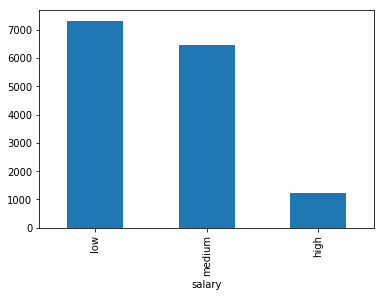

In [26]:
salary.plot.bar(legend=False)

In [27]:
salary_dep = hr[['salary_num','department','salary' ]].groupby(['department','salary_num']).count().reset_index()


In [28]:
salary_dep_p = salary_dep.pivot(index='department', columns='salary_num', values='salary')
salary_dep_p['sum'] = salary_dep_p.apply(lambda x:x[[1,2,3]].sum(), axis=1)
salary_dep_p[['low','medium','high']]=salary_dep_p[[1,2,3]]
salary_dep_p = salary_dep_p.sort_values('sum', ascending=False)
salary_dep_p.drop(labels=[1,2,3, 'sum'],axis=1,inplace=True)

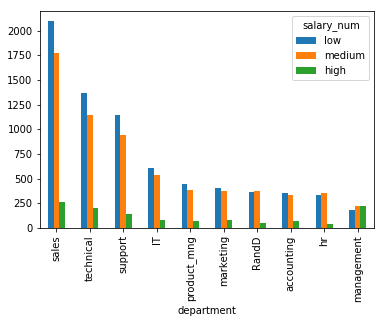

In [29]:
salary_dep_p.plot.bar()

In [30]:
# 9. Сколько сотрудников покинули компанию

In [31]:
hr[hr['left'] == 1]['left'].count()

3571

In [32]:
hr[hr['left'] == 1][['department','left']].groupby('department').count().sort_values('left', ascending=False)

,left
department,
sales,1014
technical,697
support,555
IT,273
hr,215
accounting,204
marketing,203
product_mng,198
RandD,121


In [33]:
# 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию


In [76]:
# проверим корреляцию между различными параметрами и статусом 'left'
cor = hr.corr()
cor['left'].sort_values()

satisfaction_level      -0.388375
salary_num              -0.157898
Work_accident           -0.154622
promotion_last_5years   -0.061788
depatment_num           -0.028394
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
left                     1.000000
Name: left, dtype: float64

In [119]:
# Разделим выборку по статусу left
simple_left = hr[hr['left'] == 1]
simple_no_left = hr[hr['left'] == 0]
hr.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'department', 'salary_num',
       'depatment_num'],
      dtype='object')

In [130]:
# проверим взаимосвязи между одними переменными для покинувших и непокинувших компанию
for i in ['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company',
          "Work_accident",'promotion_last_5years', 'salary_num','depatment_num']:
    print(i +": \t"+("\t"if len(i)<14 else ""), stats.ttest_ind(simple_no_left[i],simple_left[i]))

satisfaction_level: 	 Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)
last_evaluation: 	 Ttest_indResult(statistic=-0.8042416167796329, pvalue=0.4212701963735056)
number_project: 	 Ttest_indResult(statistic=-2.9138564358459607, pvalue=0.0035752138709418788)
average_montly_hours: 	 Ttest_indResult(statistic=-8.752254731850009, pvalue=2.3113035567540143e-18)
time_spend_company: 	 Ttest_indResult(statistic=-17.924210234916142, pvalue=4.207680457692835e-71)
Work_accident: 		 Ttest_indResult(statistic=19.165804033090176, pvalue=6.613049400453939e-81)
promotion_last_5years: 	 Ttest_indResult(statistic=7.581195349367637, pvalue=3.624047224146943e-14)
salary_num: 		 Ttest_indResult(statistic=19.58216626170969, pvalue=2.475238171818194e-84)
depatment_num: 		 Ttest_indResult(statistic=3.4785957362084474, pvalue=0.0005054783784655179)


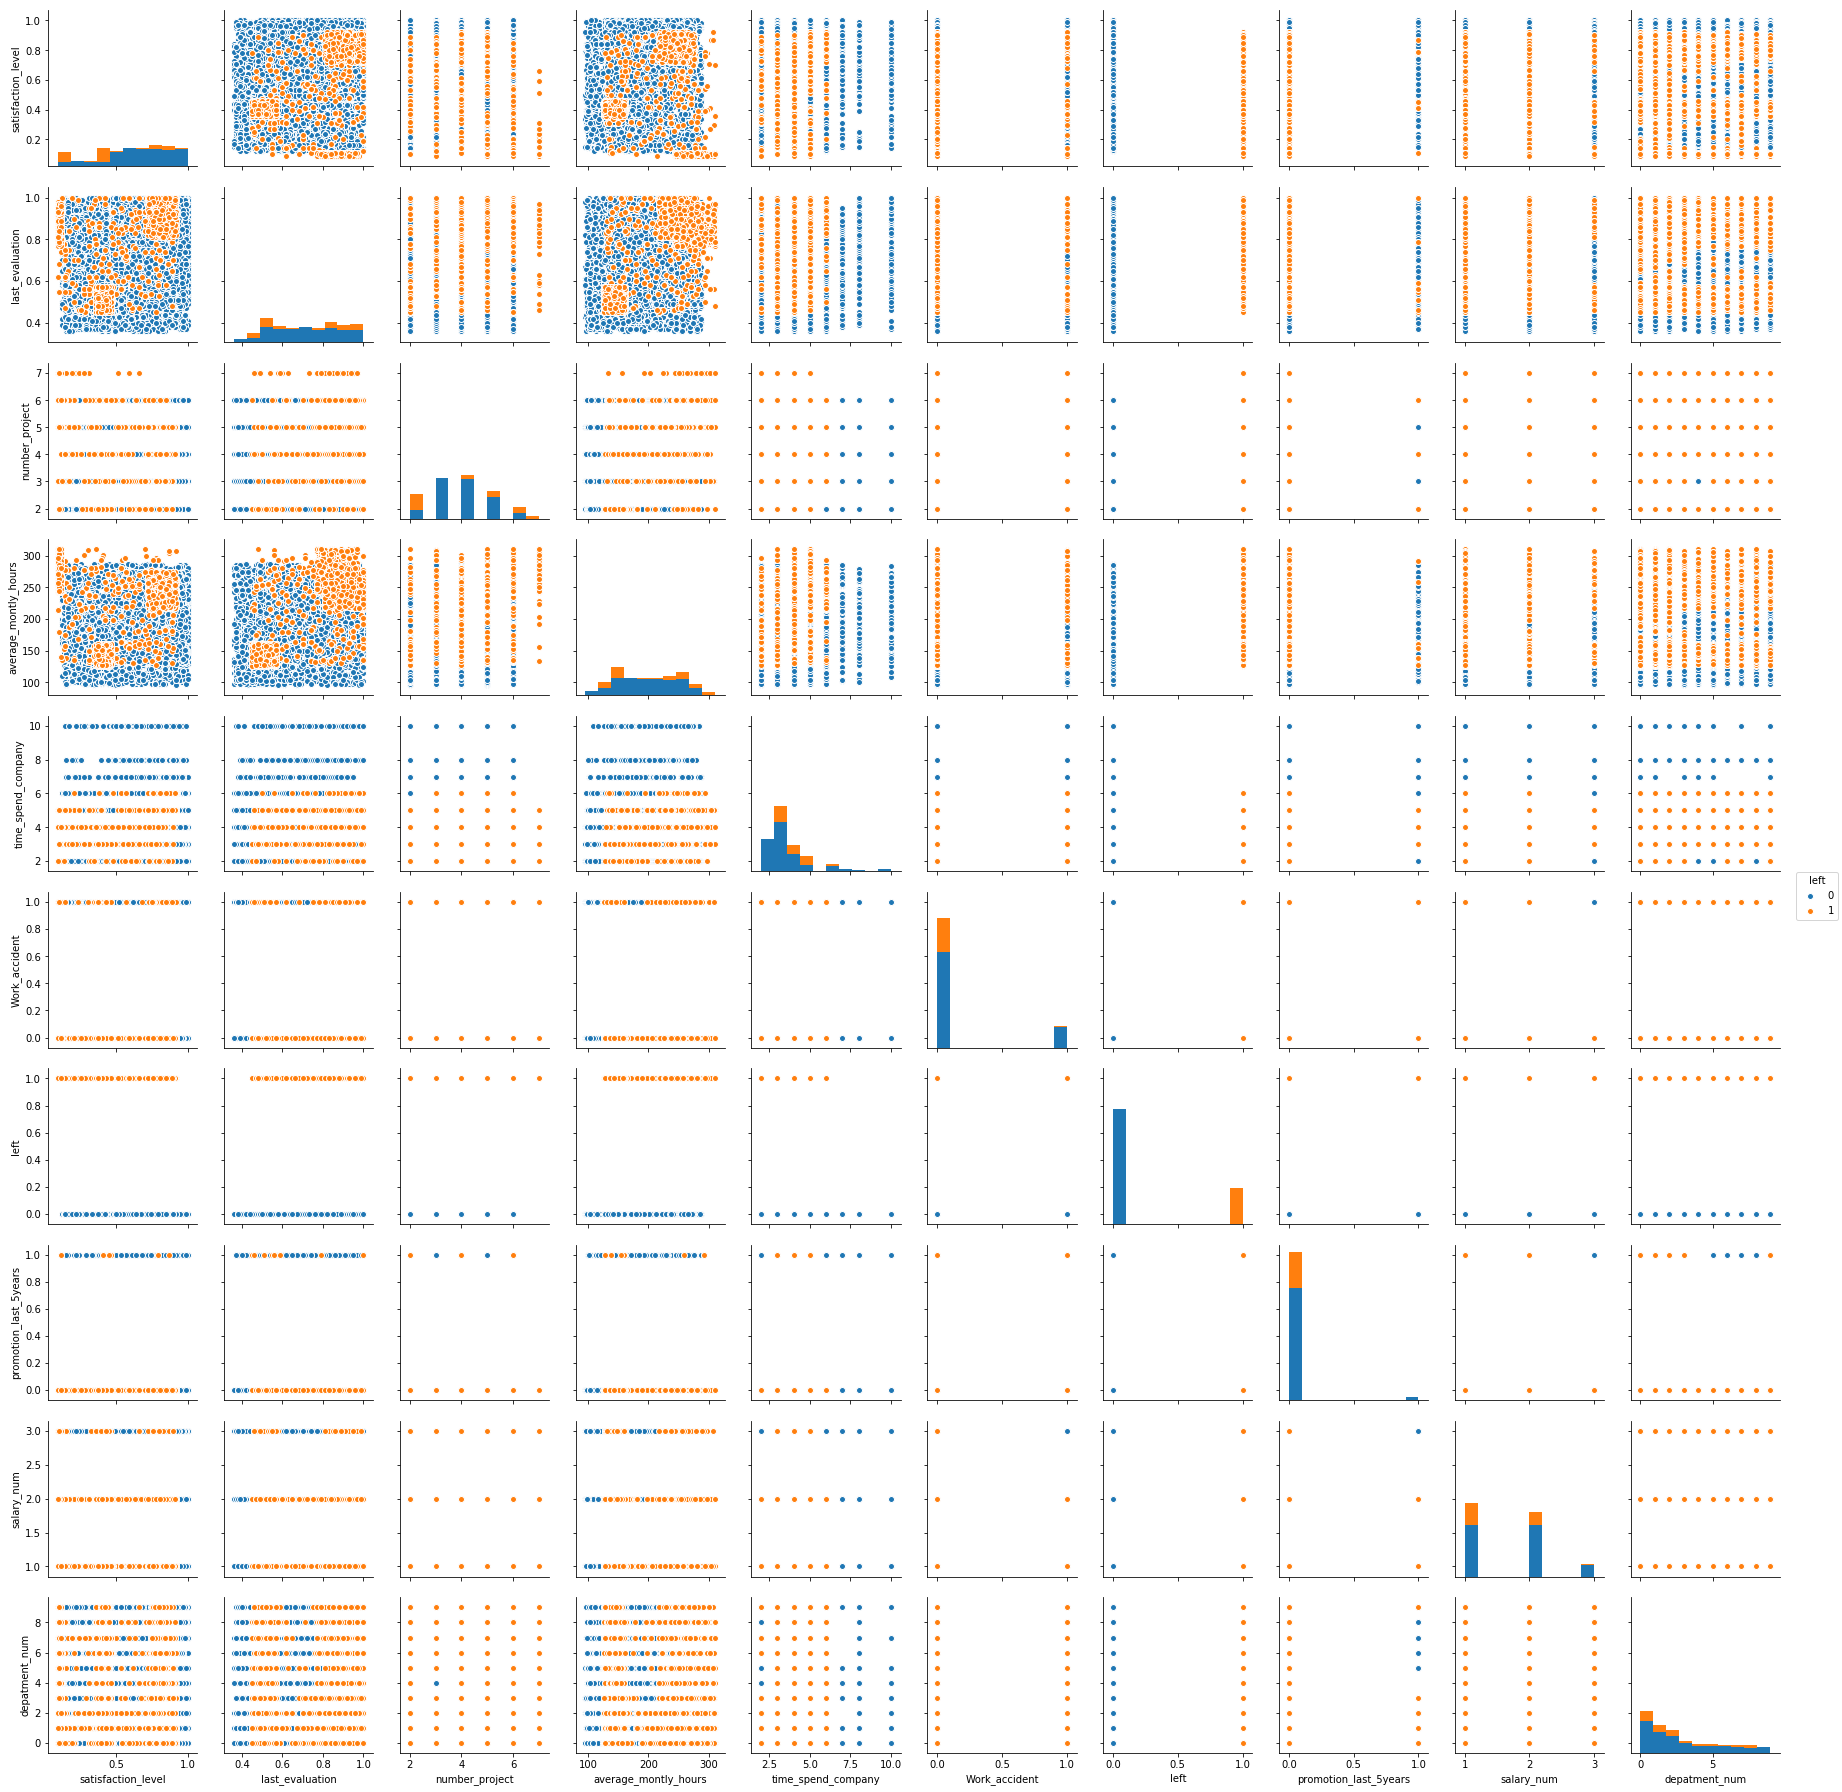

In [78]:
# построим зависимости между разными переменными с расцветкой по статусу 'left'
sns.pairplot(hr, hue='left')

/home/user/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/user/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


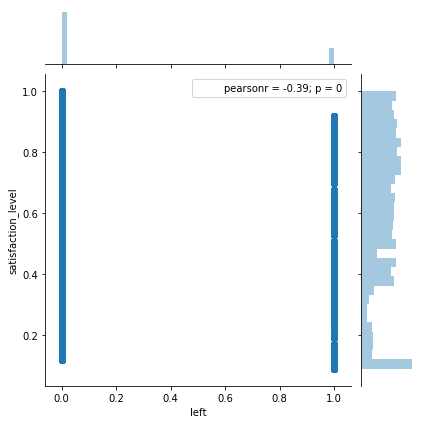

In [79]:
sns.jointplot(hr['left'], hr['satisfaction_level'])


In [80]:
# люди с высоким уровнем удовлетворенности не покидают компанию

/home/user/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/user/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


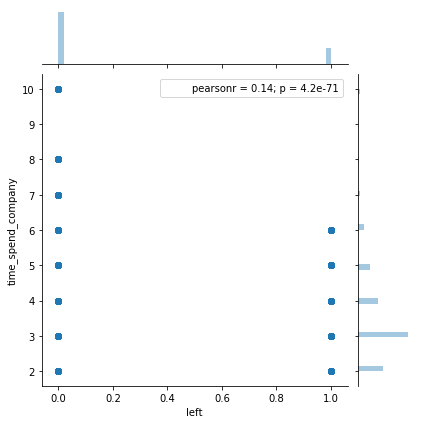

In [81]:
sns.jointplot(hr['left'], hr['time_spend_company'])

In [82]:
# люди отработавшие в компании более 6 лет не покидали компанию


/home/user/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/user/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


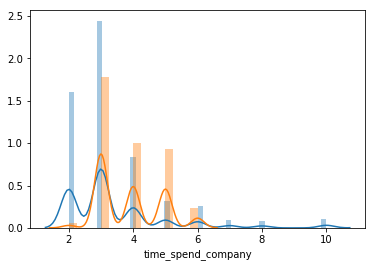

In [101]:
sns.distplot(simple_no_left['time_spend_company'])
sns.distplot(simple_left['time_spend_company'])

In [102]:
# Как видно, что работники наиьболее активно уходят из компании в период с 3 до 6 лет

/home/user/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/user/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


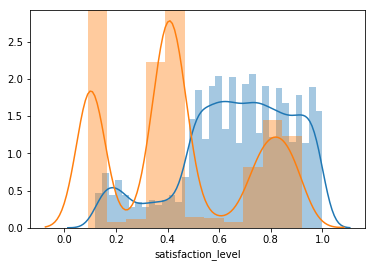

In [103]:
sns.distplot(simple_no_left['satisfaction_level'])
sns.distplot(simple_left['satisfaction_level'])

In [104]:
# видно что при низком общем уровень удовлетворенности работники склонны уходить из компании,
# но значительное число ушедших имели высокий уровень удовлетворенности

In [105]:
cor['satisfaction_level'].sort_values()

left                    -0.388375
number_project          -0.142970
time_spend_company      -0.100866
average_montly_hours    -0.020048
depatment_num           -0.008430
promotion_last_5years    0.025605
salary_num               0.050022
Work_accident            0.058697
last_evaluation          0.105021
satisfaction_level       1.000000
Name: satisfaction_level, dtype: float64

/home/user/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/user/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


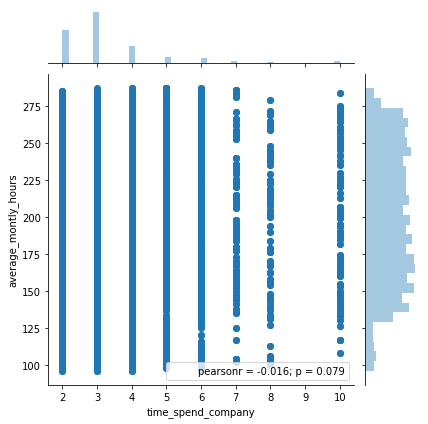

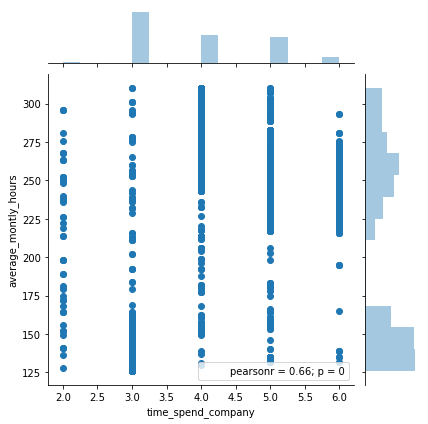

In [106]:
sns.jointplot(simple_no_left['time_spend_company'], simple_no_left['average_montly_hours'])
sns.jointplot(simple_left['time_spend_company'], simple_left['average_montly_hours'])

In [89]:
# люди работаюшие по стандартному графику (40 часов в неделю и примерно 178 в месяц) редко покидают компанию
# работники отрабатывающие количество часов в месяц больше определенного уровня все покинули компанию
# работники отрабатывающие количество часов в месяц меньше определенного уровня все остались в компанию

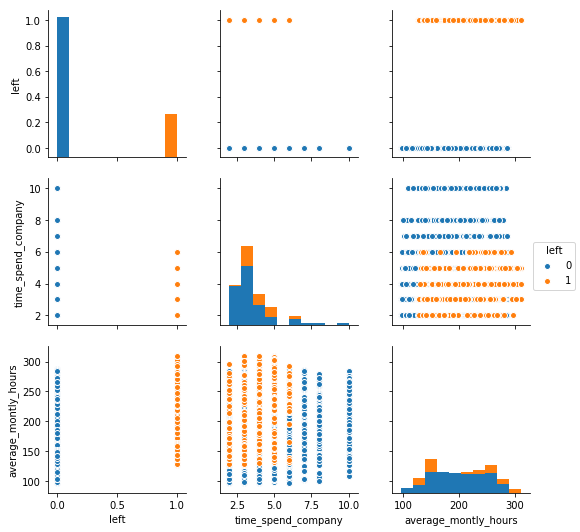

In [90]:
sns.pairplot(hr[['left','time_spend_company', 'average_montly_hours']], hue='left')

/home/user/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/user/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


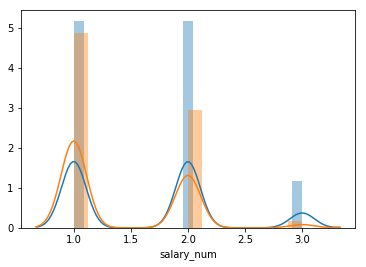

In [107]:
sns.distplot(simple_no_left['salary_num'])
sns.distplot(simple_left['salary_num'])

In [108]:
# из графика видно что работники с более низкой зарплатой склонны чаще уходить из компании
# что соответствует обратной корреляции между этими двумя параметрами

/home/user/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/user/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


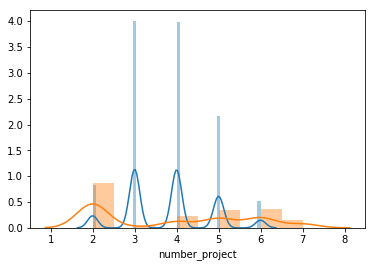

In [109]:
sns.distplot(simple_no_left['number_project'])
sns.distplot(simple_left['number_project'])

In [94]:
# Из графика можно сделать вывод о том что люди имевшие мало проектов или слишком много уходять чаще
# т.е. напрмер: 
#   малое количество графиков - однообразие и скука
#   большое количество - слишком быстрое переключение между проектами и повышенна усталость из за этого

/home/user/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/user/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


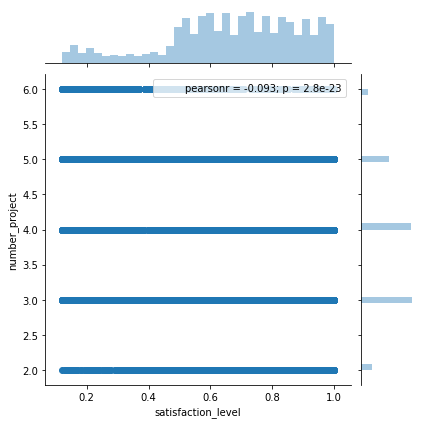

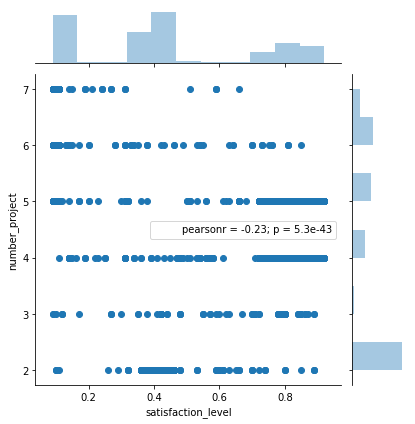

In [110]:
sns.jointplot(simple_no_left['satisfaction_level'], simple_no_left['number_project'])
sns.jointplot(simple_left['satisfaction_level'], simple_left['number_project'])

In [96]:
# Как видно из графиков люди у которых было больше 6 проектов все ушли из компании
# не имея при этом высоких уровней удовлетворенности


/home/user/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/user/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


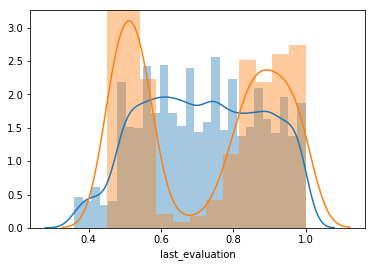

In [111]:
sns.distplot(simple_no_left['last_evaluation'])
sns.distplot(simple_left['last_evaluation'])

In [98]:
# не понял смысл параметра и по этому сложно сделать вывод, но его влияние прослеживается

In [99]:
# Из всего вышеперечисленного можно ссделать выводы
# Работники не покидают компанию если имеют:
#  - очень высокий уровен удовлетворенности 
#  - срок работы более 6 лет
#  - количество часов работы в месяц менее определенного уровня 
# В основном работники покидают компанию по комплексу причин:
#  - низкий уровень удовлетворенности
#  - недостаточная зарплата
#  - недостаточное и черезмерное количество рабочих часов рвботы в месяц
#  - слишком малое и слишком большое количяество проектов